In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data, target = load_breast_cancer(return_X_y=True, as_frame=True)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [5]:
out = (data
       .apply(lambda x:
              np.abs(zscore(x))
              .ge(3))
       .mean(1))

out_ind = np.where(out > 0.2)[0]

data.drop(out_ind, inplace=True)
target.drop(out_ind, inplace=True)

In [6]:
data.shape

(562, 30)

In [7]:
X_train, X_test, y_train, y_test = (
    train_test_split(
        data,
        target,
        test_size=0.2,
        random_state=42))

In [8]:
scaler = StandardScaler().set_output(transform='pandas')

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
pca = PCA().set_output(transform='pandas').fit(X_train)

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.4456891 , 0.63940286, 0.72719992, 0.79130713, 0.84847055,
       0.88852863, 0.90957627, 0.92687416, 0.94065068, 0.95208471,
       0.96261776, 0.97151717, 0.97894606, 0.98433941, 0.98746726,
       0.99024499, 0.99221023, 0.99375639, 0.99496295, 0.99604475,
       0.99697285, 0.99776479, 0.9984237 , 0.99892557, 0.99939135,
       0.99966577, 0.99991711, 0.99997481, 0.99999527, 1.        ])

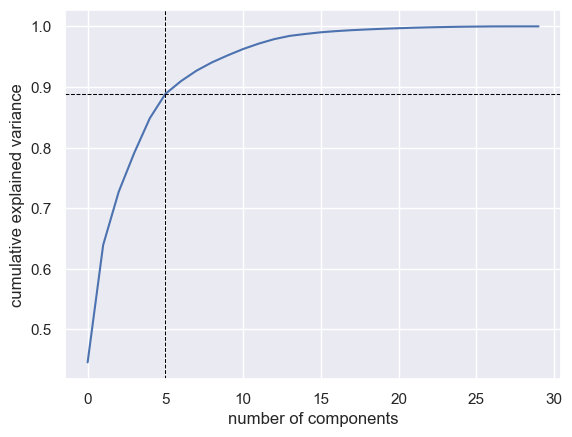

In [11]:
sns.set_theme()

explained_variance = np.cumsum(pca.explained_variance_ratio_)

ax = sns.lineplot(explained_variance)
ax.set(xlabel='number of components',
       ylabel='cumulative explained variance')

n_components = np.searchsorted(explained_variance, 0.85)

ax.axvline(x=n_components,
           c='black',
           linestyle='--',
           linewidth=0.75)

ax.axhline(y=explained_variance[n_components],
           c='black',
           linestyle='--',
           linewidth=0.75)

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
X_train_pca.iloc[:, :n_components].head()

,pca0,pca1,pca2,pca3,pca4
471,-1.929969,-0.850474,3.491870,2.458801,-0.462936
0,10.076273,1.756517,-0.945022,-3.233516,-2.160090
12,8.868784,2.689110,6.603851,-0.357798,1.227696
454,-2.778858,-1.078334,-1.625110,-0.261071,0.184463
23,4.792710,-5.567007,-0.079847,0.719455,-0.709729


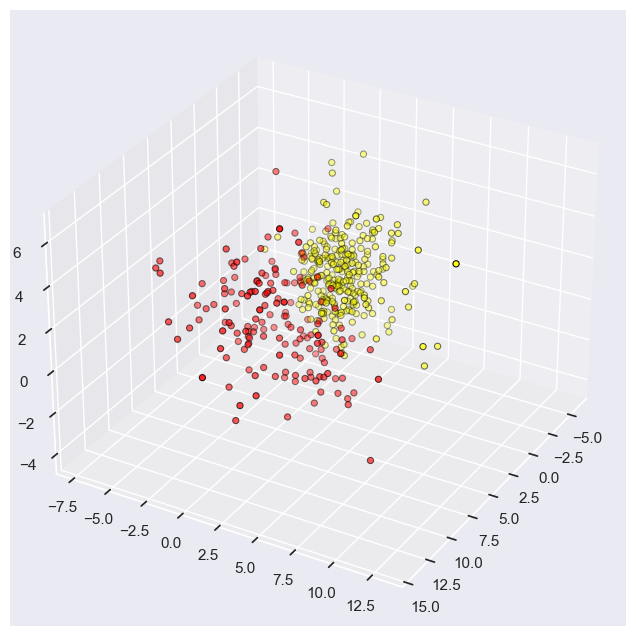

In [14]:
plt.figure(figsize=(8, 8))

ax = plt.subplot(projection='3d')

ax.scatter3D(
    X_train_pca.iloc[:, 0],
    X_train_pca.iloc[:, 1],
    X_train_pca.iloc[:, 2],
    c=y_train,
    s=20,
    cmap='autumn',
    ec='black',
    lw=0.75)

ax.view_init(elev=30, azim=30)

In [15]:
clf_full = GradientBoostingClassifier()

clf_full.fit(X_train, y_train)

pred_full = clf_full.predict(X_test)

score_full = accuracy_score(y_test, pred_full)

print(f'Model accuracy: {score_full:.1%}')

Model accuracy: 93.8%


In [16]:
clf_pca = GradientBoostingClassifier()

clf_pca.fit(X_train_pca.iloc[:, :n_components], y_train)

pred_pca = clf_pca.predict(X_test_pca.iloc[:, :n_components])

score_pca = accuracy_score(y_test, pred_pca)

print(f'Model accuracy (PCA): {score_pca:.1%}')

Model accuracy (PCA): 96.5%


<Axes: >

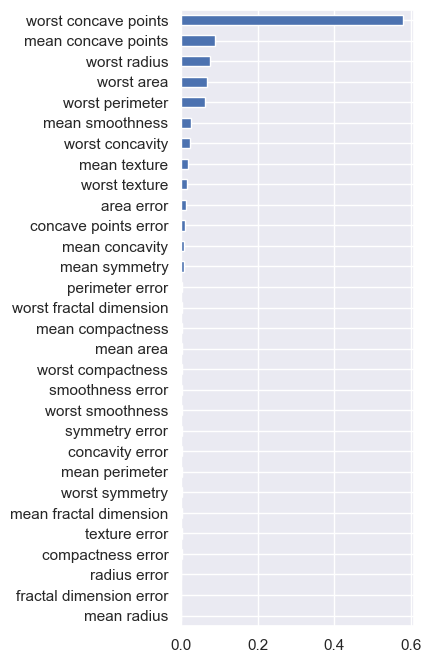

In [17]:
plt.figure(figsize=(3, 8))

(pd.Series(
    data=clf_full.feature_importances_,
    index=X_train.columns)
    .sort_values(ascending=True)
    .plot
    .barh())